<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


/tmp/ipython-input-3855125783.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['director'].fillna('Unknown', inplace=True)
/tmp/ipython-input-3855125783.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

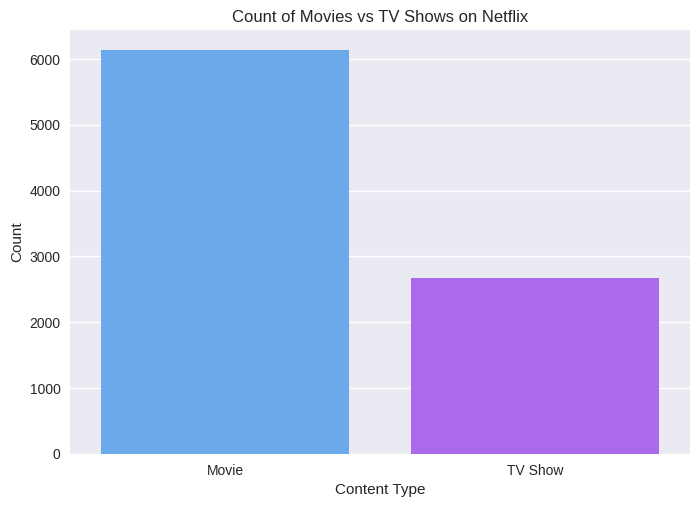

/tmp/ipython-input-3855125783.py:22: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette='crest')


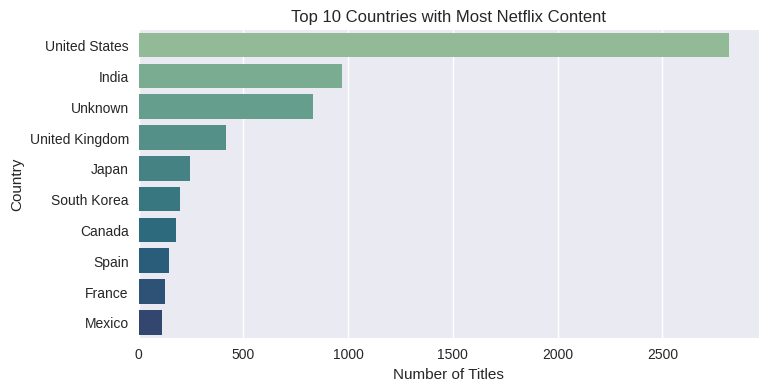

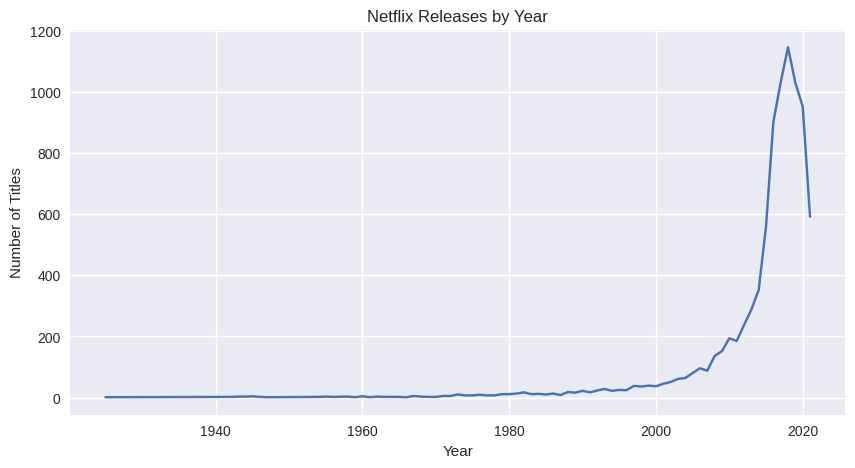

/tmp/ipython-input-3855125783.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='magma')


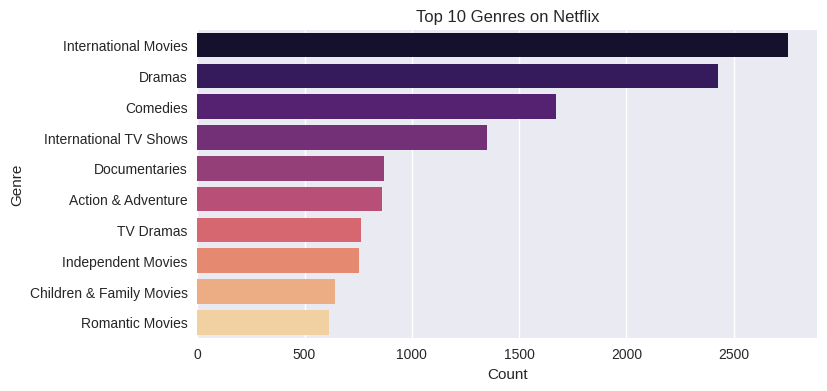

📊  Key Insights :
- Netflix has 6131 movies and 2676 TV shows.
- The US and India produce the most Netflix content.
- Drama and Comedy are the most common genres.
- Releases have increased significantly after 2015.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# make plots look nicer
plt.style.use('seaborn-v0_8')
df = pd.read_csv('netflix_titles[1].csv')
df.head()
df.info()
df.describe(include='all').T
df['director'].fillna('Unknown', inplace=True)
df['cast'].fillna('Unknown', inplace=True)
df['country'].fillna('Unknown', inplace=True)
df['date_added'].fillna('Unknown', inplace=True)
sns.countplot(x='type', data=df, palette='cool')
plt.title('Count of Movies vs TV Shows on Netflix')
plt.xlabel('Content Type')
plt.ylabel('Count')
plt.show()
top_countries = df['country'].value_counts().head(10)
plt.figure(figsize=(8,4))
sns.barplot(x=top_countries.values, y=top_countries.index, palette='crest')
plt.title('Top 10 Countries with Most Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()
df['release_year'].value_counts().sort_index().plot(kind='line', figsize=(10,5))
plt.title('Netflix Releases by Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()
genres = df['listed_in'].str.split(',').explode().str.strip()
top_genres = genres.value_counts().head(10)

plt.figure(figsize=(8,4))
sns.barplot(x=top_genres.values, y=top_genres.index, palette='magma')
plt.title('Top 10 Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()
print("📊  Key Insights :")
print(f"- Netflix has {len(df[df['type']=='Movie'])} movies and {len(df[df['type']=='TV Show'])} TV shows.")
print("- The US and India produce the most Netflix content.")
print("- Drama and Comedy are the most common genres.")
print("- Releases have increased significantly after 2015.")
df.to_csv('cleaned_netflix_data.csv', index=False)
